In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE
import sys

In [3]:
df= pd.read_csv("/content/drive/MyDrive/remote desk/bank-additional-full.csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
df.isnull().sum() # no missing value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.sum

In [ ]:
for name,dtype in df.dtypes.iteritems():
  print(name,dtype)

age int64
job object
marital object
education object
default object
housing object
loan object
contact object
month object
day_of_week object
duration int64
campaign int64
pdays int64
previous int64
poutcome object
emp.var.rate float64
cons.price.idx float64
cons.conf.idx float64
euribor3m float64
nr.employed float64
y object


In [19]:
for i in df:
  print("rows：\t%-8s\t , have\t%-5d\tUnknown date；"%(i,list(df[i]).count("unknown")))

rows：	age     	 , have	0    	Unknown date；
rows：	job     	 , have	330  	Unknown date；
rows：	marital 	 , have	80   	Unknown date；
rows：	education	 , have	1731 	Unknown date；
rows：	default 	 , have	8597 	Unknown date；
rows：	housing 	 , have	990  	Unknown date；
rows：	loan    	 , have	990  	Unknown date；
rows：	contact 	 , have	0    	Unknown date；
rows：	month   	 , have	0    	Unknown date；
rows：	day_of_week	 , have	0    	Unknown date；
rows：	duration	 , have	0    	Unknown date；
rows：	campaign	 , have	0    	Unknown date；
rows：	pdays   	 , have	0    	Unknown date；
rows：	previous	 , have	0    	Unknown date；
rows：	poutcome	 , have	0    	Unknown date；
rows：	emp.var.rate	 , have	0    	Unknown date；
rows：	cons.price.idx	 , have	0    	Unknown date；
rows：	cons.conf.idx	 , have	0    	Unknown date；
rows：	euribor3m	 , have	0    	Unknown date；
rows：	nr.employed	 , have	0    	Unknown date；
rows：	y       	 , have	0    	Unknown date；


In [35]:
total=[]

for index,row in df.iterrows():
  temp = []
  temp.append(row['age'])
  temp.append(job_to_int[row['job']])
  temp.append(marital_to_int[row['marital']])
  temp.append(education_to_int[row['education']])
  temp.append(default_to_int[row['default']])
  temp.append(housing_to_int[row['housing']])
  temp.append(loan_to_int[row['loan']])
  temp.append(contact_to_int[row['contact']])
  temp.append(month_to_int[row['month']])
  temp.append(day_to_int[row['day_of_week']])
  temp.append(row['duration'])
  temp.append(row['campaign'])
  temp.append(row['pdays'])
  temp.append(row['previous'])
  temp.append(poutcome_to_int[row['poutcome']])
  temp.append(row['emp.var.rate'])
  temp.append(row['cons.price.idx'])
  temp.append(row['cons.conf.idx'])
  temp.append(row['euribor3m'])
  temp.append(row['nr.employed'])
  temp.append(class_to_int[row['y']])
  total.append(temp)

In [42]:
new_df=pd.DataFrame(total)
new_df.columns=col_names
print (new_df.describe())

               age          job       marital     education       default  \
count  41188.00000  41188.00000  41188.000000  41188.000000  41188.000000   
mean      40.02406      3.72458      1.172769      3.747184      0.417525   
std       10.42125      3.59456      0.608902      2.136482      0.812813   
min       17.00000      0.00000      0.000000      0.000000      0.000000   
25%       32.00000      0.00000      1.000000      2.000000      0.000000   
50%       38.00000      2.00000      1.000000      3.000000      0.000000   
75%       47.00000      7.00000      2.000000      6.000000      0.000000   
max       98.00000     11.00000      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.571914      0.199767      0.365252      5.607896      1.979581   
std        0.541209      0.456002      0.481507      2.040998      1.

In [41]:
corr=new_df.corr()
print (corr.iloc[20,:])
total = np.array(total)
#low convariance:default and housing

age              -0.030399
job              -0.025122
marital          -0.046203
education        -0.057799
default           0.099324
housing          -0.009552
loan              0.005038
contact           0.144773
month            -0.037187
day_of_week      -0.010051
duration         -0.405274
campaign          0.066357
pdays             0.324914
previous         -0.230181
poutcome         -0.129789
emp.var.rate      0.298334
cons.price.idx    0.136211
cons.conf.idx    -0.054878
euribor3m         0.307771
nr.employed       0.354678
y                 1.000000
Name: y, dtype: float64


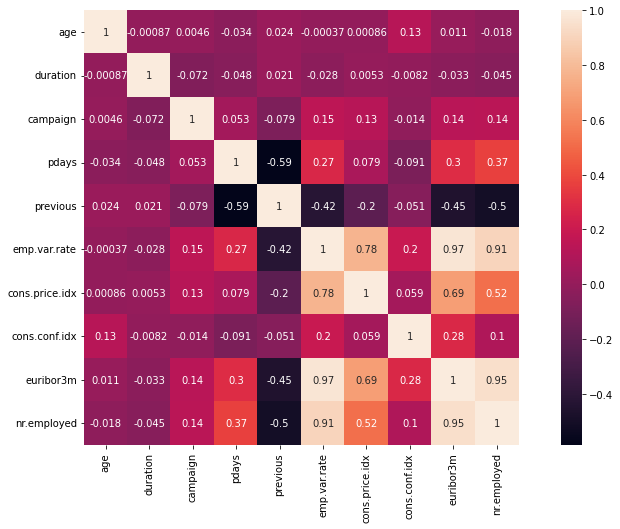

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = df.iloc[:,:-1].corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns,square=True, annot=True)
plt.show()

4640
36548


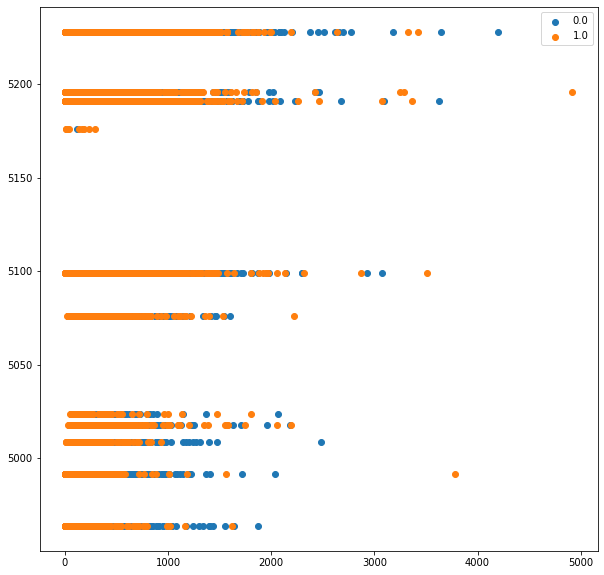

In [44]:
len_no=len(new_df[new_df['y']==0])
len_yes=len(new_df[new_df['y']==1])
groups = new_df.groupby('y')
fig, axes = plt.subplots(1, 1, figsize=(10,10))
for name, group in groups:
  print (group['y'].size)
  axes.scatter(group['duration'].values,group['nr.employed'], marker='o', label=name)
axes.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, a

36548 36548
36548 4640


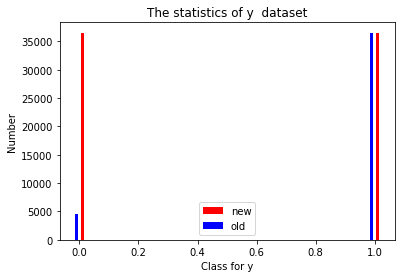

In [45]:
X=total[:,0:20]
y = df['y'].values
y = np.array([class_to_int[c] for c in y])
more_sample = SMOTE(random_state=21)
X, y = more_sample.fit_resample(X, y)
len_new_yes=len(y[[y==1]])
len_new_no=len(y[[y==0]])
print (len_new_yes,len_new_no)
print (len_yes,len_no)

plt.xlabel('Class for y')
plt.ylabel('Number')
plt.title('The statistics of y  dataset')
x_new=[0.01,1.01]
x_old=[-0.01,0.99]
old=[len_no,len_yes]
new=[len_new_no,len_new_yes]
plt.subplot(1,1,1)
plt.ylim=(0, 10)
plt.bar(x_new, new, facecolor='red', width=0.01, label = 'new')
plt.bar(x_old, old, facecolor='blue', width=0.01, label = 'old')
plt.legend()

plt.show()

In [46]:
print (X[:,[10,19]])
scaler = MinMaxScaler( )
scaler.fit(X[:,10].reshape(-1,1))
X[:,10]=scaler.transform(X[:,1].reshape(-1,1)).reshape(1,-1)
scal = MinMaxScaler( )
scal.fit(X[:,19].reshape(-1,1))
X[:,19]=scal.transform(X[:,19].reshape(-1,1)).reshape(1,-1)
print (X[:,[1,19]])

X = X[:,[0,1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]]#without low convariance

[[ 261.         5191.        ]
 [ 149.         5191.        ]
 [ 226.         5191.        ]
 ...
 [ 816.44274115 5228.1       ]
 [ 193.06729218 5017.5       ]
 [ 175.7696771  5076.2       ]]
[[3.         0.85973535]
 [7.         0.85973535]
 [7.         0.85973535]
 ...
 [2.21370573 1.        ]
 [0.         0.20378072]
 [0.2303229  0.42570888]]


In [47]:
def draw_acc(x_plot,y_plot):
  fig, ax = plt.subplots()
  ax.plot(x_plot, y_plot, 'o')
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

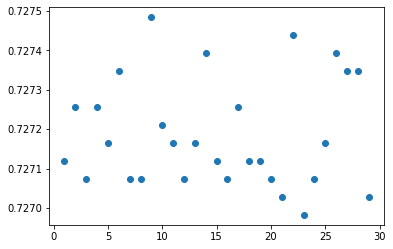

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #30%test
x_plot=[]
y_plot=[]
for step in range(1, 30):
    logistic_regression=LogisticRegression(C=step/100., solver='sag', multi_class='multinomial')
    logistic_regression.fit(X_train, y_train)
    pred=logistic_regression.predict(X_test)
    acc=accuracy_score(y_test, pred)
    x_plot.append(step)
    y_plot.append(acc)

draw_acc(x_plot=x_plot,y_plot=y_plot)

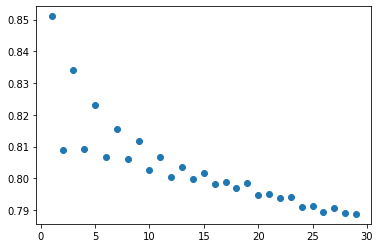

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_plot=[]
y_plot=[]
for step in range(1, 30):
  knn_model = KNeighborsClassifier(n_neighbors=step)
  knn_model.fit(X_train, y_train)
  pred=knn_model.predict(X_test)
  acc=accuracy_score(y_test, pred)
  x_plot.append(step)
  y_plot.append(acc)
draw_acc(x_plot=x_plot,y_plot=y_plot)

In [78]:
model=[]
res=[]
for i in range(0, 15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(X_train, y_train)
    pred=knn_model.predict(X_test)
    acc=accuracy_score(y_test, pred)
    model.append(knn_model)
    res.append(acc)
    

avg_acc=sum(res)/15.
print ('final result : %f ' %avg_acc)

final result : 0.852795 
